## Thinkful Data Science
Data Science Fundamentals<br>
Unit 2: Introduction to the Data Science Toolkit<br>
Lesson 2: Challenge - What Do You See?<br>
Jan. 2019

## Visualization Biodiversity in U.S. National Parks
National Parks are home to diverse ecosystems and wildlife, preserving and protecting the unadulterated beauty of nature.  As technology advances and inevitably expands the frontiers of civilization, it is critical to find a balance with nature.
<br><br>
I decided to download and visualize a data set containing data on the biodiversity of U.S. national parks.  The data set can be found on Kaggle at the following URL: https://www.kaggle.com/nationalparkservice/park-biodiversity
<br><br>
This data set comprises two CSV files:<br>
* parks.csv   -  contains information such as park name, state, size<br>
* species.csv -  contains information on various wildlife and plant species<br>

Below, the following data visualizations are shown:<br>
1. Number of National Parks by State<br>
2. State Area and National Park Coverate<br>
3. National Park Geographic Location<br>
4. Number of Fauna and Flora Species by National Park<br>

Additional future visualizations to explore:<br>
* [insert here]
* [insert here]

## 1.  States in which national parks are located

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('parks.csv')
df

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44


In [16]:
# group by State and Park Name to determine how many parks in each state
df.groupby('State')['Park Name'].count()

State
AK            8
AR            1
AZ            3
CA            7
CA, NV        1
CO            4
FL            3
HI            2
KY            1
ME            1
MI            1
MN            1
MT            1
ND            1
NM            1
NV            1
OH            1
OR            1
SC            1
SD            2
TN, NC        1
TX            2
UT            5
VA            1
WA            3
WY            1
WY, MT, ID    1
Name: Park Name, dtype: int64

In [17]:
# some parks are located in >1 state
# create dictionary to store (state: # parks) as (key: value) pairs
state_park_count = {}
for index, row in df.iterrows():
    
    state_string = row['State']
    states = state_string.split(',')
    
    for state in states:
        state = state.strip()
        
        if state not in state_park_count.keys():
            state_park_count[state] = 1
        else:
            state_park_count[state] += 1

# create list of alphabetized states (sorted dictionary keys)
# create list of number of parks according to alphabetized list of states
ordered_state = []
ordered_state_park_count = []
for state in sorted(state_park_count):
    
    ordered_state.append(state)
    ordered_state_park_count.append(state_park_count[state])

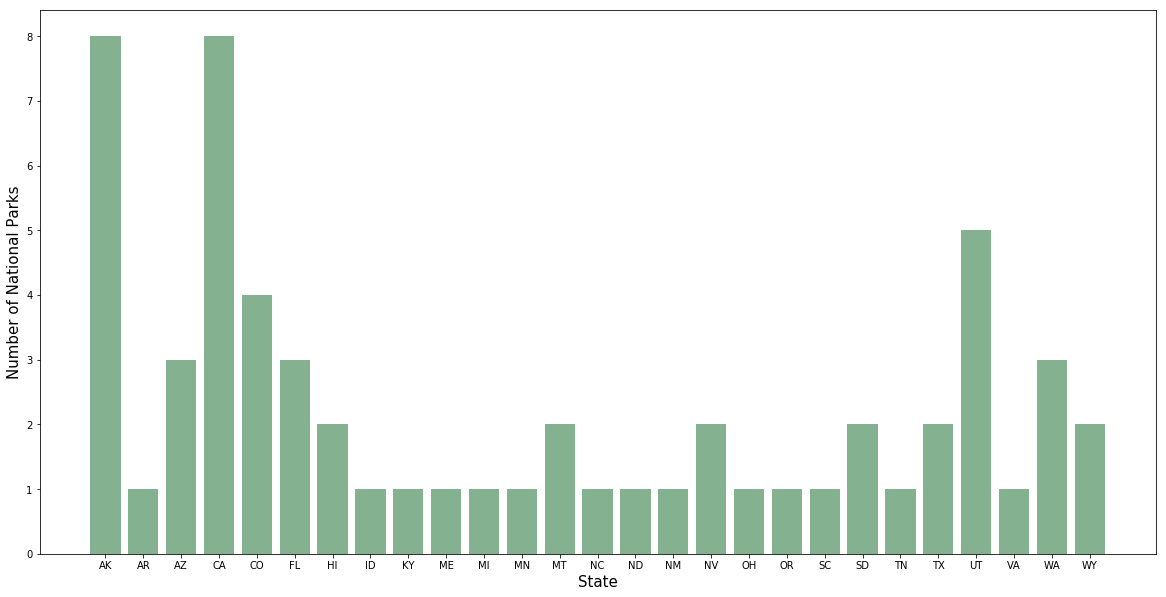

In [32]:
# plot Number of National Parks vs. State
plt.figure(figsize=(20,10));
plt.bar(ordered_state, ordered_state_park_count, color=(11/255,102/255,35/255), alpha=0.5)
plt.xlabel('State', fontsize=15)
plt.ylabel('Number of National Parks', fontsize=15)

plt.show()

## 2. Looking at the % area coverage by national parks

In [19]:
# Use dictionary to store (state: state land area) as (key: value) pairs
# NOTE: state area values entered in sq. miles (info from Wikipedia); then converted to acres
state_area = {}
state_area['AK'] = 663268
state_area['AR'] = 53180
state_area['AZ'] = 113990
state_area['CA'] = 163696
state_area['CO'] = 104094
state_area['FL'] = 65755
state_area['HI'] = 10931
state_area['ID'] = 83797
state_area['KY'] = 40408
state_area['ME'] = 35385
state_area['MI'] = 96716
state_area['MN'] = 86936
state_area['MT'] = 147040
state_area['NC'] = 53819
state_area['ND'] = 70762
state_area['NM'] = 121699
state_area['NV'] = 110577
state_area['OH'] = 44825
state_area['OR'] = 98381
state_area['SC'] = 32030
state_area['SD'] = 77116
state_area['TN'] = 42143
state_area['TX'] = 268581
state_area['UT'] = 84899
state_area['VA'] = 42774.2
state_area['WA'] = 71362
state_area['WY'] = 97914

# convert from sq. miles to acres
# 1 sq. mile = 640 acres
for key in state_area.keys():
    state_area[key] *= 640

In [20]:
# create dictionary containing (state: national park area) as (key, value) pairs
# NOTE: for parks located in >1 state, equally distribute area among number of states
# until further information of national park area distribution becomes available
state_park_area = {}
for index, row in df.iterrows():
    
    state_string = row['State']
    state_acres = row['Acres']
    
    states = state_string.split(',')
    num_states = len(states)
    
    area_per_state = state_acres / num_states
    
    for state in states:
        
        state = state.strip()
        
        if state not in state_park_area.keys():
            state_park_area[state] = area_per_state
        else:
            state_park_area[state] += area_per_state

# create lists for state area and state park area corresponding to alphabetized list of states
ordered_state_area = []
for key in sorted(state_area):
    ordered_state_area.append(state_area[key])

ordered_state_park_area = []
for key in sorted(state_park_area):
    ordered_state_park_area.append(state_park_area[key])

# create list for % of state that is national park
ordered_state_park_area_percent = []
for ii in range(0, len(ordered_state)):
    ordered_state_park_area_percent.append(100 * ordered_state_park_area[ii] / ordered_state_area[ii])

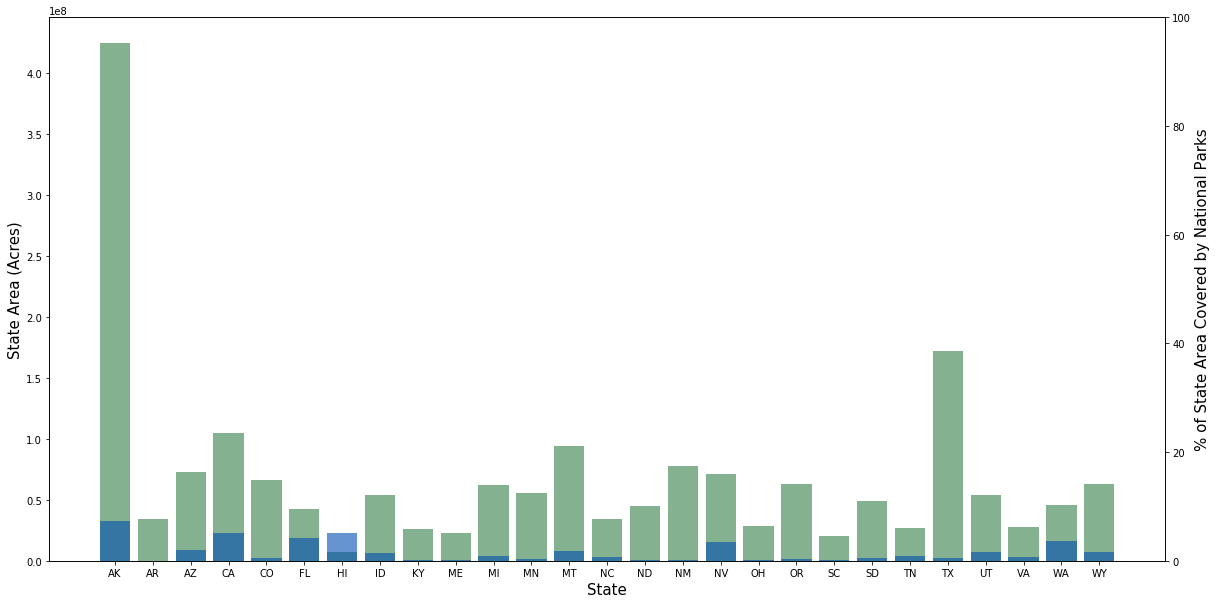

In [21]:
# plot State Area (Acres) vs. State and % State Area Covered by National Parks vs. State
# overlay two bar graphs

fig, ax_1 = plt.subplots(figsize=(20,10))

# mirror axes
ax_2 = ax_1.twinx()

# plot
ax_1.bar(ordered_state, ordered_state_area, color=(11/255,102/255,35/255), alpha=0.5)
ax_2.bar(ordered_state, ordered_state_park_area_percent, color=(0, 0.3, 0.7), alpha=0.6)

# format
ax_1.set_xlabel('State', fontsize=15)
ax_1.set_ylabel('State Area (Acres)', fontsize=15)
ax_2.set_ylabel('% of State Area Covered by National Parks', fontsize=15)
ax_2.set_ylim([0,100])

plt.show()

## 3. Visualize U.S. National Parks by geographic location

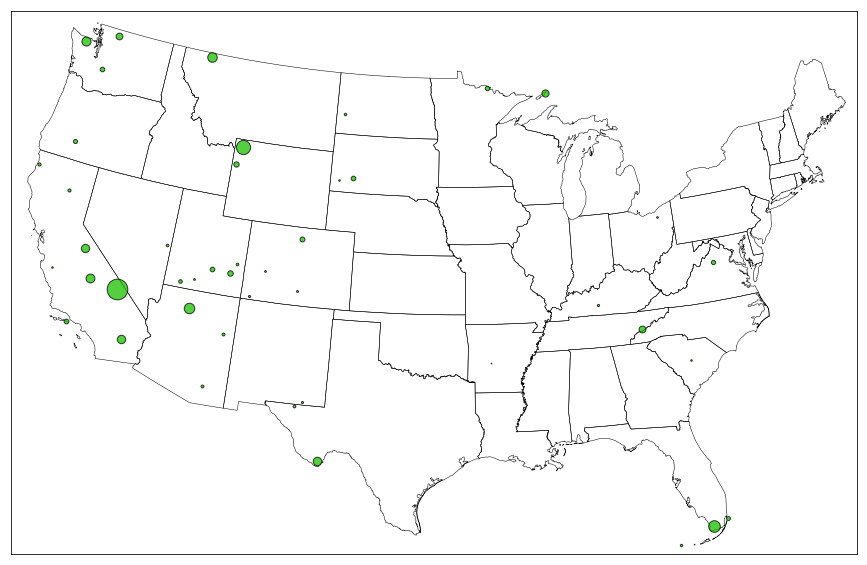

In [34]:
# reference for plotting U.S. map of contiguous states: 
# https://gis.stackexchange.com/questions/198530/plotting-us-cities-on-a-map-with-matplotlib-and-basemap
from mpl_toolkits.basemap import Basemap
import math

# create figure and set size
plt.figure(figsize=(20,10))

# call Basemap
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
              projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# park size and longitude, latitude
lon = df['Longitude']
lat = df['Latitude']
park_acre = df['Acres']
num_parks = len(park_acre)

# variables for scaling markersize for plotting
min_park_acre = min(park_acre)
max_park_acre = max(park_acre)
min_markersize = 0.5

# plot
for ii in range(0, num_parks):
    x_map, y_map = map(lon[ii], lat[ii])
    area = park_acre[ii]
    markersize_scale = area / min_park_acre
    markersize_val = min_markersize * markersize_scale
    map.plot(x_map, y_map, 
             marker='o', 
             color=(0.1,0.75,0),
             alpha=0.75,
             markersize=np.sqrt(markersize_val),
             #markersize=5,
             markeredgecolor=(0,0,0)
            )
plt.show()

## 4. Visualizing the Biodiversity of National Parks

In [35]:
# NOTE: search what options can be specified with .read_csv method; what options need for mixed data types
spec_df = pd.read_csv('species.csv', low_memory=False)
spec_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
5,ACAD-1005,Acadia National Park,Mammal,Carnivora,Felidae,Lynx canadensis,Canada Lynx,Approved,Not Confirmed,Native,NaN,NaN,NaN,NaN
6,ACAD-1006,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,NaN,NaN
7,ACAD-1007,Acadia National Park,Mammal,Carnivora,Mephitidae,Mephitis mephitis,"Eastern Skunk, Polecat, Striped Skunk",Approved,Not Present (Historical Report),Native,NaN,NaN,NaN,NaN
8,ACAD-1008,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,NaN,NaN
9,ACAD-1009,Acadia National Park,Mammal,Carnivora,Mustelidae,Martes pennanti,"Blackcat, Fisher, Pekan",Approved,Present,Native,Rare,NaN,NaN,NaN


In [26]:
# get all unique Category names
unique_category = spec_df['Category'].unique()
for category in unique_category:
    print(category)

Mammal
Bird
Reptile
Amphibian
Fish
Vascular Plant
Spider/Scorpion
Insect
Invertebrate
Fungi
Nonvascular Plant
Crab/Lobster/Shrimp
Slug/Snail
Algae


In [27]:
# define list containing categories corresponding to fauna or flora
# note that fungi is not strictly flora, although I am classifying it as such here
fauna_categories = ['Mammal',
                    'Bird',
                    'Reptile',
                    'Amphibian',
                    'Fish',
                    'Spider/Scorpion',
                    'Insect',
                    'Invertebrate',
                    'Crab/Lobster/Shrimp',
                    'Slug/Snail'
                    ]
flora_categories = ['Vascular Plant',
                    'Fungi',
                    'Nonvascular Plant',
                    'Algae'
                    ]

In [28]:
# group by park, category


# create dictionary of (Park Name: (# fauna species, # flora species) ) as (key: value) pairs
state_park_fauna_flora = {}

grouped = spec_df.groupby(['Park Name', 'Category'])
for ID, data in grouped:
    
    #print(len(name)), print(len(category))
    #print(name, category)
    #print(name)
    #print(category.shape)
    park_name = ID[0]
    category = ID[1]
    num_category = len(data)
    
    if park_name not in state_park_fauna_flora.keys():
        state_park_fauna_flora[park_name] = [0,0]
    else:
        if category in fauna_categories:
            state_park_fauna_flora[park_name][0] += num_category
        if category in flora_categories:
            state_park_fauna_flora[park_name][1] += num_category

for park in sorted(state_park_fauna_flora.keys()):
    print("{0:45s}: # fauna species = {1}, # flora species = {2}".format(park,
                                                                     state_park_fauna_flora[park][0],
                                                                     state_park_fauna_flora[park][1]))


# NOTE: some commented lines of code for myself to review and learn

# spec_df.groupby('Park Name')['Category'].count()
# series = spec_df.groupby(['Park Name', 'Category'])['Species ID']
    
#print(spec_df.groupby(['Park Name', 'Category']).groups)
#grouped = spec_df.groupby(['Park Name'])['Category'].count()
#print(grouped)
#for name, category in grouped:
#    print(name, category)


Acadia National Park                         : # fauna species = 468, # flora species = 1226
Arches National Park                         : # fauna species = 295, # flora species = 745
Badlands National Park                       : # fauna species = 581, # flora species = 798
Big Bend National Park                       : # fauna species = 619, # flora species = 1637
Biscayne National Park                       : # fauna species = 1164, # flora species = 554
Black Canyon of the Gunnison National Park   : # fauna species = 269, # flora species = 835
Bryce Canyon National Park                   : # fauna species = 307, # flora species = 975
Canyonlands National Park                    : # fauna species = 351, # flora species = 865
Capitol Reef National Park                   : # fauna species = 357, # flora species = 1203
Carlsbad Caverns National Park               : # fauna species = 526, # flora species = 995
Channel Islands National Park                : # fauna species = 932, # flor

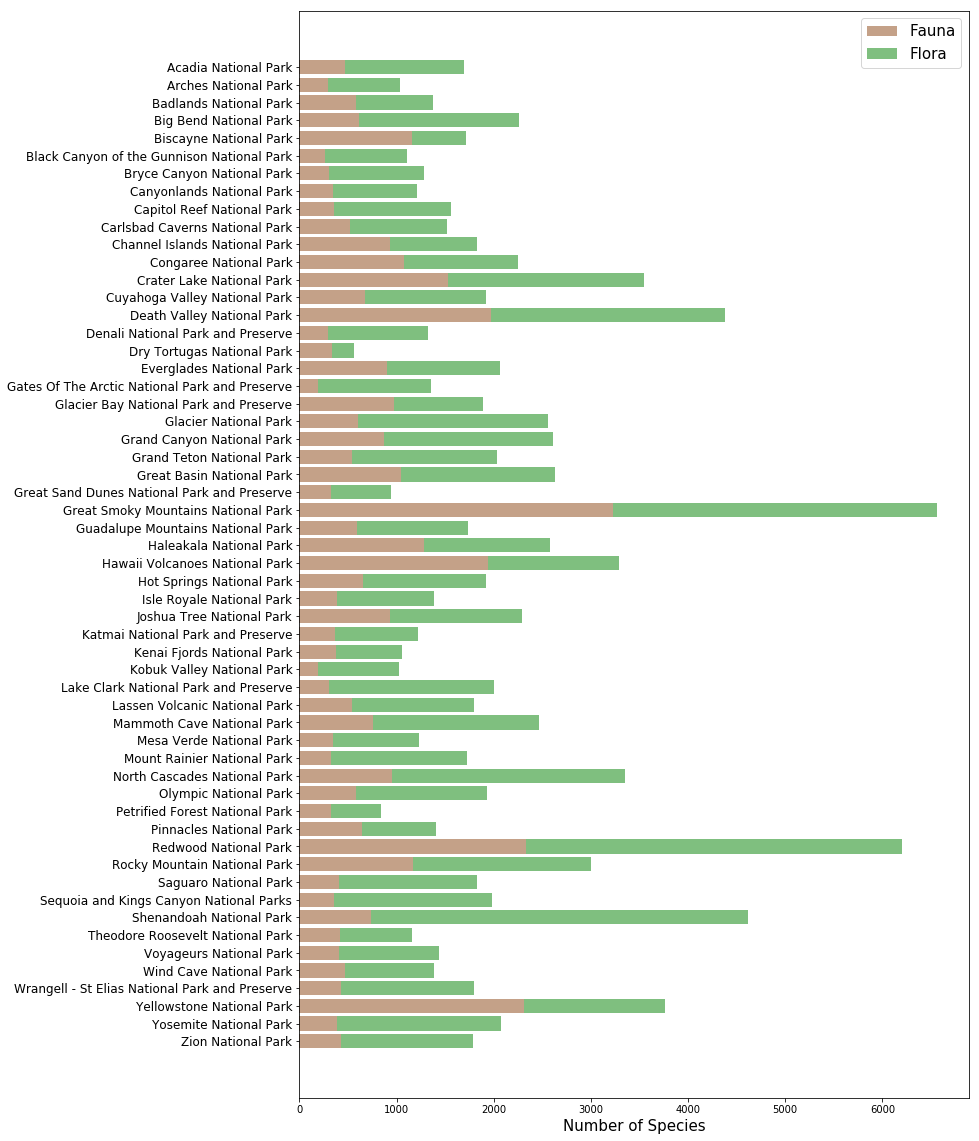

In [36]:
# plot [# fauna species | # flora species] as horizontal bar for each national park
# general syntax for creating a horizontal bar graph
# matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)

# QUESTIONS:
# 1) how do I get black edge around each section of each bar?
# 2) how do I create a legend from the plot below without having to improvise such a solution as below

fig, ax = plt.subplots(figsize=(12,20));

count = 0
for park in sorted(state_park_fauna_flora):
    
    num_fauna = state_park_fauna_flora[park][0]
    num_flora = state_park_fauna_flora[park][1]
    plt.barh(-count, num_fauna, height=0.8, align='center', color=(139/255,69/255,19/255), alpha=0.5)
    plt.barh(-count, num_flora, height=0.8, left=num_fauna, align='center', color='green', alpha = 0.5)
    count += 1

# format axes
ax.set_xlabel('Number of Species', fontsize=15);
ax.set_yticks(np.arange(0, -count, step=-1));
ax.set_yticklabels(list(sorted(state_park_fauna_flora.keys())), fontsize=12);


# hack a solution for legend
color_values = ((139/255,69/255,19/255), 'green');
h = plt.barh([100,100], [0,0], height=0, color=color_values, alpha=0.5);
plt.legend(h, ('Fauna', 'Flora'), fontsize=15);

plt.show();